# Lab 4: Root finding (1)

The first serious problem we will tackle is root finding. In this lab we'll implement two very simple algorithms, called the *bisection algorithm* and *regula falsi* ("false position") methods. For notes on the algorithms themselves don't forget to consult this week's cheat sheet on QM+.

A reminder that **you should follow bold instructions**, evaluate cells containing code unless otherwise instructed, and stop at the checkpoints (&#9654;) to discuss your progress with a demonstrator.

## The bisection algorithm

Recall that this takes as input a function $f$ and range $(l, u)$ such that $f(l)$ and $f(u)$ have opposite signs. We *bisect* the range – that is, find the middle, $m$ – and depending on the sign of $f(m)$, locate the root in either the lower half $(l, m)$ or upper half $(m, u)$ of the original range:

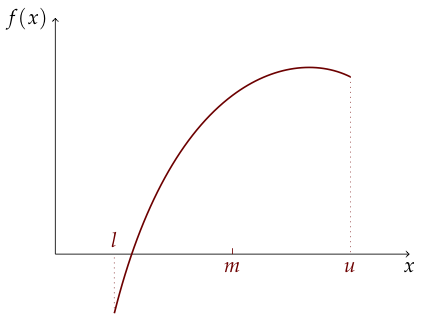

Let's write a function to perform one step of this algorithm. **Complete the half-written code for this function below.**

In [7]:
def bisection_step(f, bounds):
    """Performs one step of the bisection algorithm to locate a root of f, 
    and returns a smaller range in which the root is found.
    
    f: function of a single variable with a root within bounds
    bounds: tuple of two numbers representing the range to search for the root"""
    
    lower, upper = bounds      # "Unpack" the tuple so that we can manipulate the lower and upper bound separately
    middle = (lower + upper)/2 # Calculate the midpoint
    
    if f(lower) * f(middle) < 0: # We want this code to run if f(l) and f(m) have opposite signs. Fill in the condition here
        return (lower, middle)
    else:
        return (middle, upper) # Fill in an appropriate return value here if the condition is false
#bisection_step(f,(-2,100))

In order to test this out, we'll need a suitable test function. Let's try a really simple one where we know the answer: $f(x) = x^2 - 4$, which of course has roots at $x = \pm2$:

In [3]:
def f(x):
    return x**2 - 4

Just for fun, **plot this function in the range $(0,5)$.**

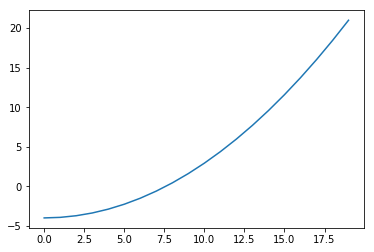

In [8]:
from matplotlib.pyplot import plot, figure
from pylab import linspace
figure()
x = linspace(0,5,20)
plot(f(x))

**Insert an appropriate loop command** in the code below to perform 20 steps of this algorithm on our newly defined $f(x)$, starting from the range $(0,5)$ and printing out the new range at each step.

In [9]:
# Print column titles (the "^" makes them centred; try "<" or ">"!)
print("{:^15}  {:^15}  {:^15}".format("lower", "upper", "difference"))

l, u = 0, 5 # Starting range
for i in range(1, 20):    # Put in an appropriate loop here
    # The crucial step: check you understand how this works!
    l, u = bisection_step(f, (l, u)) 
    # This format string prints out three values, each with width 15 characters and 12 decimal places
    print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l)) 

     lower            upper         difference   
 0.000000000000   2.500000000000   2.500000000000
 1.250000000000   2.500000000000   1.250000000000
 1.875000000000   2.500000000000   0.625000000000
 1.875000000000   2.187500000000   0.312500000000
 1.875000000000   2.031250000000   0.156250000000
 1.953125000000   2.031250000000   0.078125000000
 1.992187500000   2.031250000000   0.039062500000
 1.992187500000   2.011718750000   0.019531250000
 1.992187500000   2.001953125000   0.009765625000
 1.997070312500   2.001953125000   0.004882812500
 1.999511718750   2.001953125000   0.002441406250
 1.999511718750   2.000732421875   0.001220703125
 1.999511718750   2.000122070312   0.000610351562
 1.999816894531   2.000122070312   0.000305175781
 1.999969482422   2.000122070312   0.000152587891
 1.999969482422   2.000045776367   0.000076293945
 1.999969482422   2.000007629395   0.000038146973
 1.999988555908   2.000007629395   0.000019073486
 1.999998092651   2.000007629395   0.000009536743


**Does the width of the range change as expected at each step? Does the algorithm converge to the known root?**

**Now write another loop along the same lines, but this time stopping only when the range is smaller than a set tolerance (say $10^{-8}$). How many iterations does this take, starting from $(0, 5)$?**

In [10]:
l, u = 0, 5 
steps = 0
while u - l > 1e-8:
    l, u = bisection_step(f, (l, u))
    steps += 1
print(steps,l) 

29 1.9999999925494194


&#9654; **CHECKPOINT 1**

## *Regula falsi*

This algorithm is very similar but tries to make a more sensible guess at the root than simply the midpoint of the range. Instead, we calculate the intersection point of a straight line through $(l, f(l))$ and $(u, f(u))$, which turns out to be
$$
m = \frac{lf(u) - uf(l)}{f(u)-f(l)}:
$$

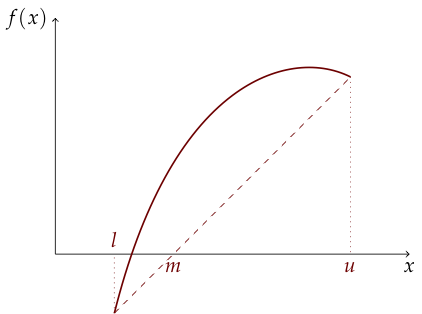

**In the same way as above, write a function to perform one step of this algorithm.**

In [12]:
def regula_falsi_step(f, bounds):
    """Performs one step of the regula falsi algorithm to locate a root of f, 
    and returns a smaller range in which the root is found.
    
    f: function of a single variable with a root within bounds
    bounds: tuple of two numbers representing the range to search for the root"""
    
    lower, upper = bounds
    midpoint = ((lower * f(upper)) - (upper * f(lower))) / (f(upper) - f(lower)) #?
    if  f(lower) * f(midpoint) < 0:
        return (lower, midpoint)
    else:
        return (midpoint, upper)
regula_falsi_step(f, (0, 5))

(0.8, 5)

Unlike the bisection algorithm, the size of the range in *regula falsi* is not guaranteed to converge to zero. So to test whether the calculation is complete, we should check whether we've found a root by checking the value of $f$ at both endpoints.

**Write a loop using *regula falsi* that repeats until $|f(l)|$ or $|f(u)|$ is less than $10^{-8}$. How many iterations are needed to solve $x^2 - 4 = 0$ starting from the range $(0, 5)$? Is *regula falsi* more efficient than the bisection rule in this case?**

In [15]:
lower, upper = 0, 5
s = 0
while abs(f(lower)) > 1e-8 and abs(f(upper)) > 1e-8:
    #regula_falsi_step(f, (lower, upper))
    s += 1
    lower, upper = regula_falsi_step(f, (lower, upper))
    print(s, lower, upper)
f(lower)

1 0.8 5
2 1.3793103448275863 5
3 1.7081081081081082 5
4 1.8694601128122486 5
5 1.9429912023460412 5
6 1.9753670445521971 5
7 1.989405737953084 5
8 1.9954527198259269 5
9 1.9980498988316284 5
10 1.999164009461251 5
11 1.999641675546843 5
12 1.999846424515811 5
13 1.99993418049131 5
14 1.9999717913738932 5
15 1.999987910540093 5
16 1.999994818793949 5
17 1.9999977794814774 5
18 1.9999990483489027 5
19 1.999999592149474 5
20 1.9999998252069073 5
21 1.9999999250886726 5
22 1.999999967895145 5
23 1.9999999862407762 5
24 1.9999999941031898 5
25 1.9999999974727958 5
26 1.9999999989169126 5


-4.332349590185913e-09

▶ **CHECKPOINT 2**

**Now explore the behaviour of each of these two methods for finding roots.** You might like to consider the following questions:

- Which functions can they be applied to? 
- Can you predict how many iterations they will require? 
- Is it possible that they will not converge? 
- Is it possible that they will converge to a value that is not a root?
- Is it possible that there is a root within the initial range that they do not find?

To help your exploration, you might like to look at the following functions, although you should of course also try others that you invent yourself:
- $g(x) = x^8 - 2x - 1$
- $h(x) = \dfrac{x-1}{x-2}$
- $j(x) = x^3 + 47x^2 - 148x + 90$
- $k(x) = x^4 - 8x^3 + 22x^2 - 24x + 9$

You may want to plot these functions to help you answer the questions.

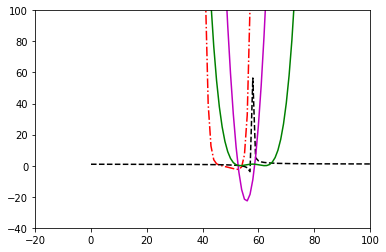

In [13]:
from matplotlib.pyplot import plot, figure, xlim, ylim 
from pylab import linspace

def g(x):
    return x**8 - 2*x - 1
def h(x):
    return (x - 1)/ (x - 2)
def j(x):
    return x**3 + 47*(x**2) - 148*x + 90
def k(x):
    return x**4 - 8*(x**3) + 22*(x**2) - 24*x + 9
#regula_falsi_step(g,)

x = linspace(-11,101,500)
xlim(-20,100)
ylim(-40,100)
plot(g(x),'r-.')
plot(h(x),'k--')
plot(j(x),'m')
plot(k(x),'g')

▶ **CHECKPOINT 3**

## Extension

You will have seen in your exploration that the bisection and *regula falsi* algorithms are complementary: they work well in different ways and in different situations. **Invent a hybrid method that implements an appropriate combination of these steps.** Can you find an algorithm that is better (say, converges faster) than either the bisection or *regula falsi* methods individually?